### DBSCAN
- Density 기반의 clustering algorithm
- 알고리즘을 설명하기 위해 다음 5가지 용어를 사용

Core, Eps, Noise, MinPts, Border

Eps와 MinPts가 hyperparameter가 됨

- Eps안에 MinPts 이상의 개수가 들어있으면 Core가 되며, 
- MinPts보다 적은 개수가 들어있으면 Border,
- 아예 들어있지 않으면 Noise가 된다

Algorithm
1. 임의의 오브젝트 P를 선택 
2. Eps와 MinPts를 만족하는 P와 연결된 모든 포인트를 탐색 
3. 
 - 만약 P가 Core 라면 새로운 클러스터를 생성 
 - 만약 P가 Border 또는 Noise 라면, 데이터베이스 내의 다른 오브젝트를 P로 선택 

4. 모든 오브젝트를 방문할 때까지 반복

2번을 어떻게 쓰는지에 따라 성능이 많이 차이나게 됨

In [39]:
import csv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler

In [6]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
path = './datasets/kddcup_data_10_percent_corrected.csv'
data = pd.read_csv(path, names = col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [8]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [9]:
unique_labels = data['label'].unique()
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [104]:
selected_data = pd.DataFrame()

for label in unique_labels : 
    selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:500]])

selected_data

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [105]:
labels = selected_data['label'].to_numpy() 
labels

KeyError: 'label'

In [106]:
data = selected_data.drop('label', axis=1) 
data

KeyError: "['label'] not found in axis"

In [107]:
# _의 자리에는 각 숫자가 어떤 것이었는지 기록함. 지금은 안쓸 것이므로 없앰.
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()

data

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [108]:
data[0]

array([-0.66888467,  0.19655174,  0.95868964])

In [109]:
data = PCA(n_components=3).fit_transform(data)

In [110]:
data[0]

array([-0.66888467,  0.19655174,  0.95868964])

In [111]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]
colors


[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [112]:
def gen_color_dict(_unique_labels, _colors) :
    color_dict = dict()
    
    for i in range(len(_unique_labels)) : 
        color_dict[_unique_labels[i]] = _colors[i]
        
    return color_dict

In [113]:
gt_color_dict = gen_color_dict(unique_labels, colors)
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

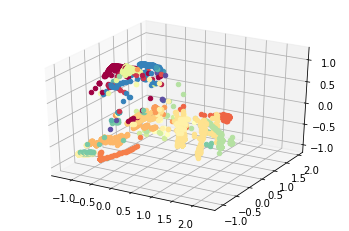

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data)): 
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])
plt.show()

In [131]:
dbscan = DBSCAN(eps = 0.085, min_samples = 9) 
dbscan.fit(data)

DBSCAN(eps=0.085, min_samples=9)

In [132]:
dbscan_label = dbscan.labels_ 
dbscan_unique_labels = list(set(dbscan_label)) 
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(dbscan_unique_labels))] 
dbscan_color_dict = gen_color_dict(dbscan_unique_labels, colors)

In [133]:
# fig = plt.figure() 
# ax = fig.add_subplot(111, projection='3d')
# for i in range(len(data)) : 
#     ax.scatter(data[i][0], data[i][1], data[i][2], 
# c=[dbscan_color_dict[dbscan_label[i]]])

# plt.show()

In [134]:
n_clusters_ = len(set(dbscan_label)) - (1 if -1 in dbscan_label else 0)

print('Estimated number of clusters: %d' % n_clusters_) 
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, dbscan_label)) 
print("Completeness: %0.3f" % metrics.completeness_score(labels, dbscan_label)) 
print("V-measure: %0.3f" % metrics.v_measure_score(labels, dbscan_label)) 

Estimated number of clusters: 24
Homogeneity: 0.830
Completeness: 0.785
V-measure: 0.807


1) eps = 0.3, min_sample 10

- Estimated number of clusters: 10
- Homogeneity: 0.528
- Completeness: 0.880
- V-measure: 0.660

2) eps = 0.3, min_sample = 5

* Estimated number of clusters: 8
* Homogeneity: 0.354
* Completeness: 0.845
* V-measure: 0.499

3) eps = 0.4, min_sample = 15

* Estimated number of clusters: 8
* Homogeneity: 0.305
* Completeness: 0.839
* V-measure: 0.447